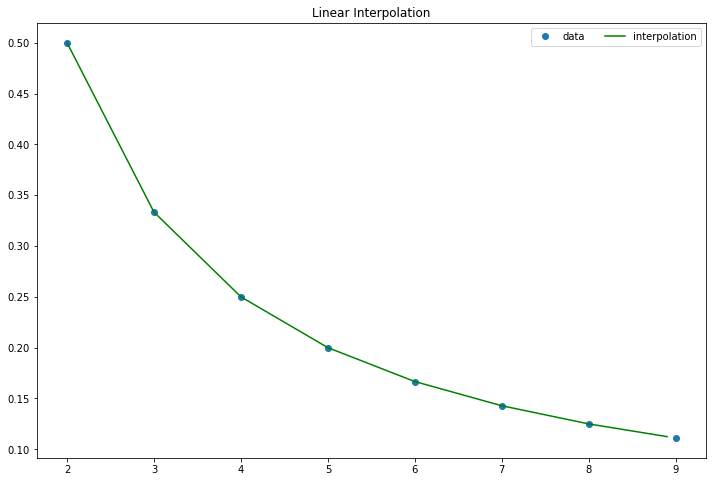

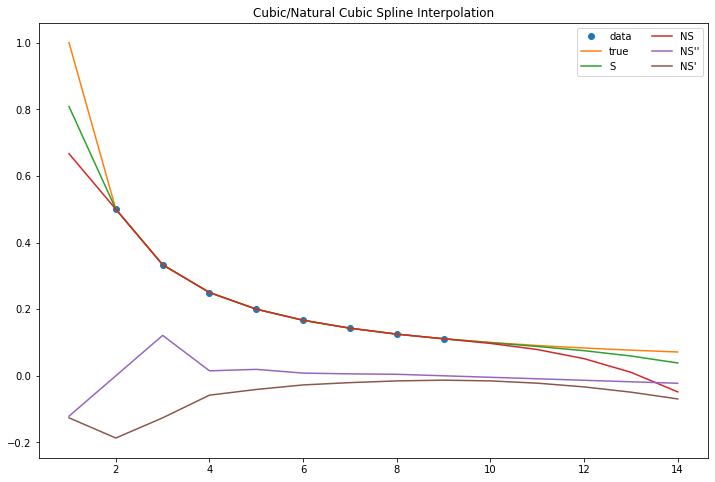

Value of double differentiation at boundary conditions are -1.1102230246251565e-16 and -0.00450262550915248


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d
plt.rcParams['figure.figsize'] =(12,8)
  
x = np.arange(2,10)
y = 1/(x)
# apply cubic spline interpolation
cs = CubicSpline(x, y, extrapolate=True)
# apply natural cubic spline interpolation
ns = CubicSpline(x, y,bc_type='natural', extrapolate=True)
  
# Apply Linear interpolation
linear_int = interp1d(x,y)
  
xs = np.arange(2, 9, 0.1)
ys = linear_int(xs)
  
# plot linear interpolation
plt.plot(x, y,'o', label='data')
plt.plot(xs,ys,  label="interpolation", color='green')
plt.legend(loc='upper right', ncol=2)
plt.title('Linear Interpolation')
plt.show()
  
# define a new xs
xs = np.arange(1,15)
#plot cubic spline and natural cubic spline
plt.plot(x, y, 'o', label='data')
plt.plot(xs, 1/(xs), label='true')
plt.plot(xs, cs(xs), label="S")
plt.plot(xs, ns(xs), label="NS")
plt.plot(xs, ns(xs,2), label="NS''")
plt.plot(xs, ns(xs,1), label="NS'")
  
plt.legend(loc='upper right', ncol=2)
plt.title('Cubic/Natural Cubic Spline Interpolation')
plt.show()
  
# check for boundary condition
print("Value of double differentiation at boundary conditions are %s and %s"
      %(ns(2,2),ns(10,2)))

In [2]:
from typing import Tuple, List
import bisect

def compute_changes(x: List[float]) -> List[float]:
    return [x[i+1] - x[i] for i in range(len(x) - 1)]

def create_tridiagonalmatrix(n: int, h: List[float]) -> Tuple[List[float], List[float], List[float]]:
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C

def create_target(n: int, h: List[float], y: List[float]):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0]

def solve_tridiagonalsystem(A: List[float], B: List[float], C: List[float], D: List[float]):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B)

    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)):
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1])

    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1]

    return X

def compute_spline(x: List[float], y: List[float]):
    n = len(x)
    if n < 3:
        raise ValueError('Too short an array')
    if n != len(y):
        raise ValueError('Array lengths are different')

    h = compute_changes(x)
    if any(v < 0 for v in h):
        raise ValueError('X must be strictly increasing')

    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)

    M = solve_tridiagonalsystem(A, B, C, D)

    coefficients = [[(M[i+1]-M[i])*h[i]*h[i]/6, M[i]*h[i]*h[i]/2, (y[i+1] - y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6), y[i]] for i in range(n-1)]

    def spline(val):
        idx = min(bisect.bisect(x, val)-1, n-2)
        z = (val - x[idx]) / h[idx]
        C = coefficients[idx]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]

    return spline

In [3]:
import matplotlib.pyplot as plt

test_x = [0,1,2,3]
test_y = [0,0.5,2,1.5]
spline = compute_spline(x, y)

for i, k in enumerate(test_x):
    assert abs(y[i] - spline(k)) < 1e-8, f'Error at {k}, {y[i]}'

x_vals = [v / 10 for v in range(0, 50, 1)]
y_vals = [spline(j) for j in x_vals]

plt.plot(x_vals, y_vals)

AssertionError: Error at 0, 0.5

In [4]:
x = np.array([-1,0,1,3], dtype="double")  
y = np.array([3,1,3,43], dtype="double")  
#inicializando a tabela  
T = np.zeros((4,4));  
#primeira coluna  
T[:,0]=y;  
#segunda coluna  
T[1,1]=(T[1,0]-T[0,0])/(x[1]-x[0]);  
T[2,1]=(T[2,0]-T[1,0])/(x[2]-x[1]);  
T[3,1]=(T[3,0]-T[2,0])/(x[3]-x[2]);  
#terceira coluna  
T[2,2]=(T[2,1]-T[1,1])/(x[2]-x[0]);  
T[3,2]=(T[3,1]-T[2,1])/(x[3]-x[1]);  
#quarta coluna  
T[3,3]=(T[3,2]-T[2,2])/(x[3]-x[0]);  
print(T)  
#polinomio interpolador  
p = np.array([T[0,0]], dtype="double")  
paux = np.array([-x[0],1], dtype="double")  
p.resize(2)  
p += T[1,1]*paux  
paux = poly.polymul(paux,[-x[1],1])  
p.resize(3)  
p += T[2,2]*paux  
paux = poly.polymul(paux,[-x[2],1])  
p.resize(4)  
p += T[3,3]*paux

[[ 3.  0.  0.  0.]
 [ 1. -2.  0.  0.]
 [ 3.  2.  2.  0.]
 [43. 20.  6.  1.]]


NameError: name 'poly' is not defined